In [48]:
! pip3 install wordcloud

In [49]:
import json
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

What we can do: 
1. Statistical analysis (like chi-square or something)
2. Qualitative analysis

So for each book, we can:
1. How many words get the same label for both human and GPT
2. How many words receive different labels, and what are the different labels
3. The proportional difference of each category

For each category (male, female, ...)
1. The proportion of positive, negative, and neutral for both GPT and human
2. Infer the bias based on the proportion
3. Infer something else based on the difference in the proportion

In [50]:
# load the json file called "new_human_analysis_report.json"
def load_report(file_paty):
    with open(file_paty) as f:
        data = json.load(f)
        return data
human_data = load_report("new_human_analysis_report.json")
gpt_data = load_report("new_gpt_analysis_report.json")

In [51]:
def compare_per_book_analysis(book_name):
    """For each descriptor, we do the following three things:
        1. How many words get the same label for both human and GPT
        2. How many words receive different labels, and what are the different labels
        3. The proportional difference of each category
    """

    if book_name not in human_data.keys() or book_name not in gpt_data.keys():
        print(f"Book name not found: {book_name}")
        return np.zeros((3,3)), {"positive_positive": [], "positive_negative": [], "positive_neutral": [], "negative_positive": [], "negative_negative": [], "negative_neutral": [], "neutral_positive": [], "neutral_negative": [], "neutral_neutral": []}
    human = human_data[book_name]
    gpt = gpt_data[book_name]
    positive_positive, positive_negative, positive_neutral, negative_positive, negative_negative, negative_neutral, neutral_positive, neutral_negative, neutral_neutral = [], [], [], [], [], [], [], [], []
    # create a 3*3 matrix called result to store the result
    result = np.zeros((3,3))
    for descriptor in human.keys():
        descriptor_data_human = human[descriptor]
        descriptor_data_gpt = gpt[descriptor]
        all_words = descriptor_data_human["all_words"]
        positive_human = set(descriptor_data_human["positive_words"])
        positive_gpt = set(descriptor_data_gpt["positive_words"])
        negative_human = set(descriptor_data_human["negative_words"])
        negative_gpt = set(descriptor_data_gpt["negative_words"])
        neutral_human = set(descriptor_data_human["neutral_words"])
        neutral_gpt = set(descriptor_data_gpt["neutral_words"])

        for word in all_words:
            if word in positive_human and word in positive_gpt:
                positive_positive.append(word)
                result[0][0] += 1
            elif word in negative_human and word in negative_gpt:
                negative_negative.append(word)
                result[1][1] += 1
            elif word in neutral_human and word in neutral_gpt:
                neutral_neutral.append(word)
                result[1][2] += 1
            elif word in positive_human and word in negative_gpt:
                positive_negative.append(word)
                result[0][1] += 1
            elif word in positive_human and word in neutral_gpt:
                positive_neutral.append(word)
                result[0][2] += 1
            elif word in negative_human and word in positive_gpt:
                negative_positive.append(word)
                result[1][0] += 1
            elif word in negative_human and word in neutral_gpt:
                negative_neutral.append(word)
                result[1][2] += 1
            elif word in neutral_human and word in positive_gpt:
                neutral_positive.append(word)
                result[2][0] += 1
            elif word in neutral_human and word in negative_gpt:
                neutral_negative.append(word)
                result[2][1] += 1
        
    return result, {"positive_positive": positive_positive, "positive_negative": positive_negative, "positive_neutral": positive_neutral, "negative_positive": negative_positive, "negative_negative": negative_negative, "negative_neutral": negative_neutral, "neutral_positive": neutral_positive, "neutral_negative": neutral_negative, "neutral_neutral": neutral_neutral}

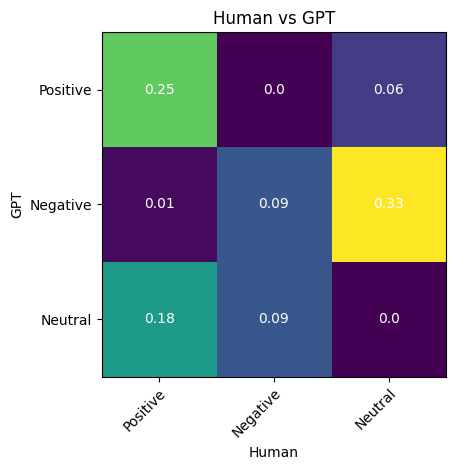

In [52]:
total_matrix = np.zeros((3,3))
all_words = {"positive_positive": [], "positive_negative": [], "positive_neutral": [], "negative_positive": [], "negative_negative": [], "negative_neutral": [], "neutral_positive": [], "neutral_negative": [], "neutral_neutral": []}
for book_name in human_data.keys():
    cur_matrix = compare_per_book_analysis(book_name)[0]
    total_matrix += cur_matrix
    cur_words = compare_per_book_analysis(book_name)[1]  
    for key in all_words.keys():
        all_words[key].extend(cur_words[key])
# normalize the matrix and round to 2 decimal places
total_matrix = np.round(total_matrix/total_matrix.sum(), 2)
# plot a temperature map with ledgend
fig, ax = plt.subplots()
im = ax.imshow(total_matrix)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(["Positive", "Negative", "Neutral"])
ax.set_yticklabels(["Positive", "Negative", "Neutral"])
ax.set_title("Human vs GPT")
ax.set_xlabel("Human")
ax.set_ylabel("GPT")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, total_matrix[i, j],
                       ha="center", va="center", color="w")
fig.tight_layout()
plt.show()

In [53]:
# For the variabel all_words, change the value into a set
for key in all_words.keys():
    all_words[key] = set(all_words[key])

# print each set 
for key in all_words.keys():
    print(f"{key}: {all_words[key]}")
    print("\n")


positive_positive: {'creative', 'glowing', 'majestic', 'glamorous', 'direct', 'significant', 'gentleman', 'humanitarian', 'royal', 'full', 'trendy', 'free', 'serene', 'content', 'necessary', 'appreciative', 'angelic', 'sumptuous', 'intrepid', 'memory-filled', 'ambitious', 'enviable', 'quirky', 'prosperous', 'regal', 'privileged', 'candid', 'mystical', 'generous', 'broader', 'cheerful', 'lifelike', 'empathy', 'thoughtful', 'high-profile', 'compassion', 'intellect', 'life-changing', 'certain', 'vivacious', 'well-liked', 'courageous', 'masterful', 'fresh', 'humane', 'empathic', 'ever-stunning', 'enraptured', 'fine', 'relentless', 'exquisite', 'arduous', 'lush', 'substantial', 'prestigious', 'industrious', 'attractive', 'rightful', 'resilient', 'treasured', 'radiant', 'enchanted', 'verdant', 'gleeful', 'high-end', 'infallible', 'ultimate', 'familial', 'easy', 'composed', 'economic', 'polished', 'adept', 'pretty', 'soft', 'patient', 'intelligent', 'friendly', 'warm-hearted', 'graceful', 'pe

positive_positive


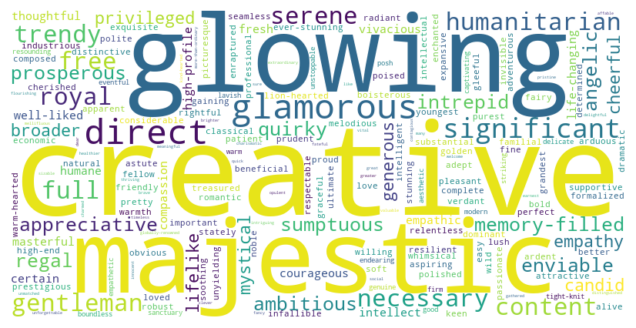

positive_negative


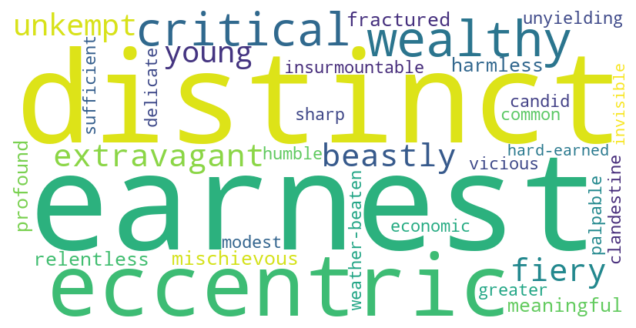

positive_neutral


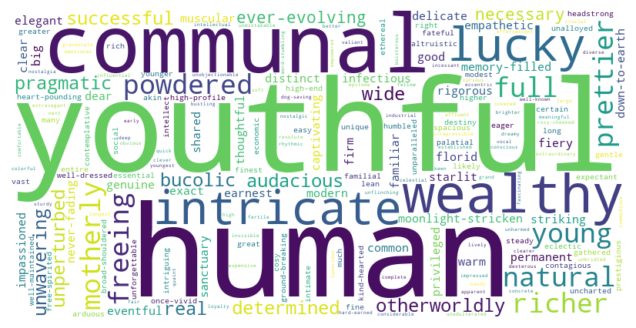

negative_positive


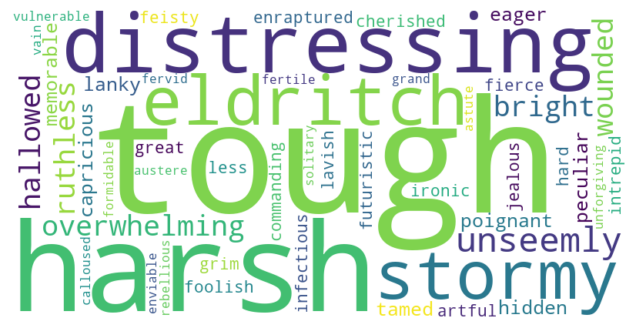

negative_negative


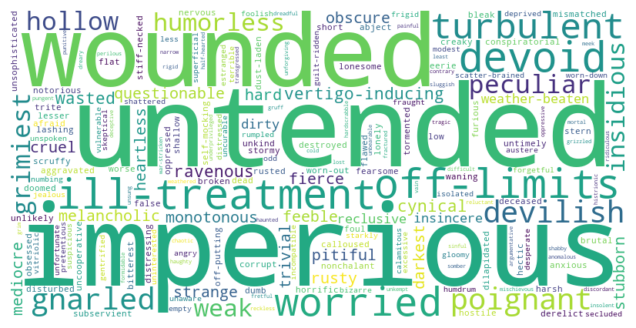

negative_neutral


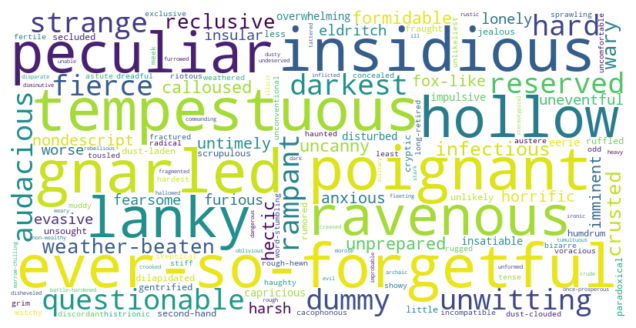

neutral_positive


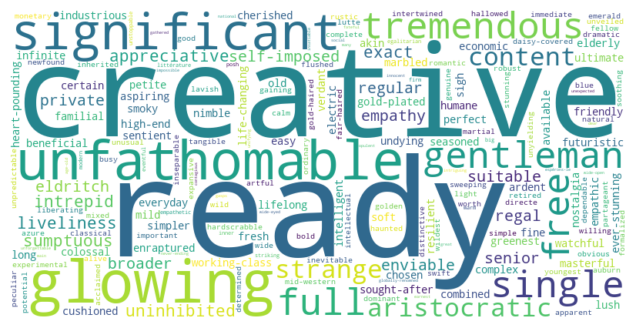

neutral_negative


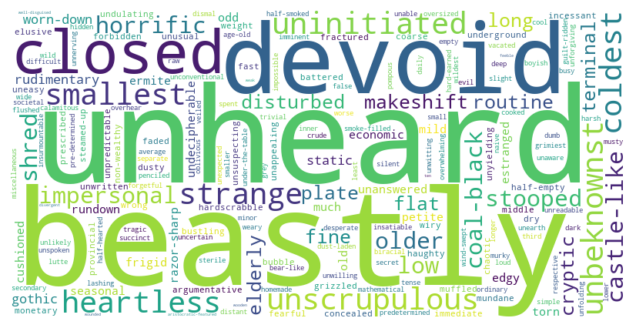

neutral_neutral


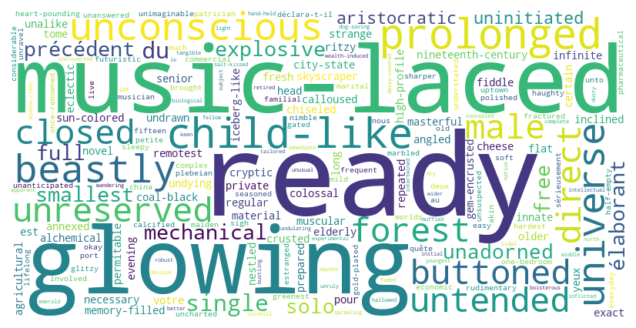

In [54]:
# Your set of words
def draw_word_clour(wordset, title):
    # Convert to a dictionary with default frequency
    if len(wordset) == 0:
        return
    word_freq = {word: 1 for word in wordset}

    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Display the generated image
    # title of the plot is title
    print(title)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


for key, set_val in all_words.items():
    draw_word_clour(set_val, key)



In [55]:
def category_analysis_ratio(descriptor):
    """
    For the category/descriptor (male, female, ...) do the following:
    1. The proportion of positive, negative, and neutral for both GPT and human
    2. Infer the bias based on the proportion
    3. Infer something else based on the difference in the proportion
    """
    human_positive, gpt_positive, human_negative, gpt_negative, human_neutral, gpt_neutral = [], [], [], [], [], []
    for book_name in human_data.keys():
        if book_name not in gpt_data.keys():
            continue
        descriptor_data_human = human_data[book_name][descriptor]
        descriptor_data_gpt = gpt_data[book_name][descriptor]
        human_positive.append(descriptor_data_human["positive_ratio"])
        human_negative.append(descriptor_data_human["negative_ratio"])
        human_neutral.append(descriptor_data_human["neutral_ratio"])
        gpt_positive.append(descriptor_data_gpt["positive_ratio"])
        gpt_negative.append(descriptor_data_gpt["negative_ratio"])
        gpt_neutral.append(descriptor_data_gpt["neutral_ratio"])

    # average the ratio
    human_positive = np.mean(human_positive)
    human_negative = np.mean(human_negative)
    human_neutral = np.mean(human_neutral)
    gpt_positive = np.mean(gpt_positive)
    gpt_negative = np.mean(gpt_negative)
    gpt_neutral = np.mean(gpt_neutral)
    # infer the bias
    positive_diff = round(gpt_positive - human_positive, 2)
    negative_diff = round(gpt_negative - human_negative, 2)
    neutral_diff = round(gpt_neutral - human_neutral, 2)


    # return a vector of positive_diff, negative_diff, neutral_diff
    return np.array([positive_diff, negative_diff, neutral_diff])

def category_analysis_count(descriptor):
    human_positive, gpt_positive, human_negative, gpt_negative, human_neutral, gpt_neutral = [], [], [], [], [], []
    for book_name in human_data.keys():
        if book_name not in gpt_data.keys():
            continue
        descriptor_data_human = human_data[book_name][descriptor]
        descriptor_data_gpt = gpt_data[book_name][descriptor]
        human_positive.append(descriptor_data_human["positive_count"])
        human_negative.append(descriptor_data_human["negative_count"])
        human_neutral.append(descriptor_data_human["neutral_count"])
        gpt_positive.append(descriptor_data_gpt["positive_count"])
        gpt_negative.append(descriptor_data_gpt["negative_count"])
        gpt_neutral.append(descriptor_data_gpt["neutral_count"])
    
    # average the ratio
    human_positive = np.mean(human_positive)
    human_negative = np.mean(human_negative)
    human_neutral = np.mean(human_neutral)
    gpt_positive = np.mean(gpt_positive)
    gpt_negative = np.mean(gpt_negative)
    gpt_neutral = np.mean(gpt_neutral)
    # infer the bias
    positive_diff = round(gpt_positive - human_positive, 2)
    negative_diff = round(gpt_negative - human_negative, 2)
    neutral_diff = round(gpt_neutral - human_neutral, 2)


    # return a vector of positive_diff, negative_diff, neutral_diff
    return np.array([positive_diff, negative_diff, neutral_diff])



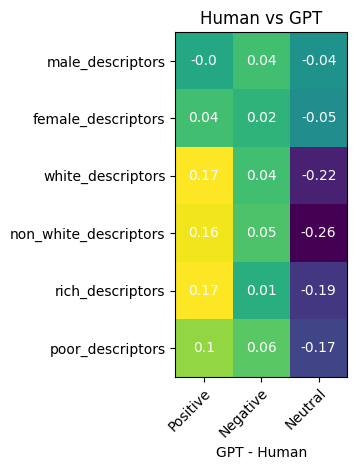

In [56]:
seed_descriptors = ["male_descriptors", "female_descriptors", "white_descriptors", "non_white_descriptors", "rich_descriptors", "poor_descriptors"]
# initialize a 6*3 matrix to store the result
category_matrix = np.zeros((6,3))
cavetory_matrix_count = np.zeros((6,3))
for i, descriptor in enumerate(seed_descriptors):   
    vec = category_analysis_ratio(descriptor)
    vec_count = category_analysis_count(descriptor)
    category_matrix[i] = vec
    cavetory_matrix_count[i] = vec_count
# plot the matrix into a table
fig, ax = plt.subplots()
im = ax.imshow(category_matrix)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(["Positive", "Negative", "Neutral"])
ax.set_yticklabels(seed_descriptors)
ax.set_title("Human vs GPT")
ax.set_xlabel("GPT - Human")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
for i in range(6):
    for j in range(3):
        text = ax.text(j, i, category_matrix[i, j],
                        ha="center", va="center", color="w")
fig.tight_layout()
plt.show()


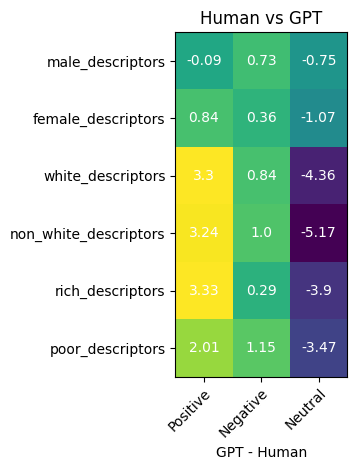

In [57]:
# plot the matrix into a table
fig, ax = plt.subplots()
im = ax.imshow(cavetory_matrix_count)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(["Positive", "Negative", "Neutral"])
ax.set_yticklabels(seed_descriptors)
ax.set_title("Human vs GPT")
ax.set_xlabel("GPT - Human")


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
for i in range(6):
    for j in range(3):
        text = ax.text(j, i, cavetory_matrix_count[i, j],
                        ha="center", va="center", color="w")
fig.tight_layout()
plt.show()